In [93]:
import warnings
import time
import sys
import datetime
import joblib
import lightgbm as lgb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

warnings.simplefilter(action='ignore', category=FutureWarning)

In [79]:
df_train = pd.read_csv('../Kaggle-data/processed/kawai_processed_0619_train.csv')
df_test = pd.read_csv('../Kaggle-data/processed/kawai_processed_0619_test.csv')

In [80]:
df_train['first_active_month'] = pd.to_datetime(df_train['first_active_month'])
df_test['first_active_month'] = pd.to_datetime(df_test['first_active_month'])

In [81]:
df_train.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,month_lag_mean,installments_mean,purchase_amount_mean,category_2_1.0_count,category_2_2.0_count,category_2_3.0_count,category_2_4.0_count,category_2_5.0_count,category_3_A_count,category_3_B_count,category_3_C_count
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,-1.252996,0.007874,-0.606428,274.0,0.0,0.0,0.0,3.0,273.0,4.0,0.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,-1.626972,1.250789,-0.674180,323.0,0.0,0.0,0.0,0.0,0.0,264.0,59.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,-3.302326,0.000000,-0.689319,4.0,0.0,0.0,0.0,40.0,44.0,0.0,0.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,-0.731746,1.007937,-0.693216,12.0,0.0,0.0,56.0,0.0,0.0,67.0,1.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,0.151127,1.000000,-0.600981,12.0,0.0,7.0,130.0,1.0,0.0,150.0,0.0
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585,-0.437500,2.765625,-0.382911,35.0,0.0,0.0,0.0,1.0,0.0,9.0,27.0
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129,-2.732046,0.000000,-0.716835,1.0,0.0,0.0,0.0,263.0,264.0,0.0,0.0
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850,0.136364,0.000000,-0.658032,7.0,0.0,0.0,18.0,0.0,25.0,0.0,0.0
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406,-1.454545,1.045455,-0.575960,13.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062,-2.032407,0.013889,-0.700961,110.0,0.0,0.0,0.0,1.0,108.0,3.0,0.0


In [82]:
df_test.head(10)

,first_active_month,card_id,feature_1,feature_2,feature_3,month_lag_mean,installments_mean,purchase_amount_mean,category_2_1.0_count,category_2_2.0_count,category_2_3.0_count,category_2_4.0_count,category_2_5.0_count,category_3_A_count,category_3_B_count,category_3_C_count
0,2017-04-01,C_ID_0ab67a22ab,3,3,1,-0.711111,1.344444,-0.644306,48.0,0.0,0.0,0.0,0.0,0.0,46.0,2.0
1,2017-01-01,C_ID_130fd0cbdd,2,3,0,-4.509398,1.175752,-0.641635,0.0,0.0,1.0,82.0,0.0,0.0,80.0,3.0
2,2017-08-01,C_ID_b709037bc5,5,1,1,-0.722222,7.555556,0.633630,1.0,0.0,0.0,0.0,9.0,0.0,0.0,10.0
3,2017-12-01,C_ID_d27d835a9f,2,1,0,0.006944,1.777778,-0.581359,32.0,0.0,0.0,0.0,1.0,0.0,22.0,11.0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1,-2.613636,1.145455,1.271492,4.0,0.0,5.0,106.0,0.0,0.0,108.0,7.0
5,2017-07-01,C_ID_5814b4f13c,5,1,1,-1.000000,1.178571,-0.102024,10.0,0.0,5.0,0.0,0.0,0.0,12.0,3.0
6,2017-10-01,C_ID_a1b3c75277,1,2,0,-0.071221,1.411337,-0.441944,1.0,8.0,0.0,0.0,42.0,0.0,33.0,18.0
7,2017-02-01,C_ID_f7cada36d3,3,1,1,-5.350000,0.000000,-0.689928,20.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0
8,2017-07-01,C_ID_9d2bc8dfc4,4,3,0,-1.821429,6.660714,0.115853,4.0,0.0,24.0,0.0,1.0,0.0,11.0,18.0
9,2016-03-01,C_ID_6d8dba8475,5,1,1,-2.027778,1.010417,-0.641163,57.0,0.0,0.0,0.0,0.0,0.0,56.0,1.0


In [96]:
# ターゲットが通常値か異常値かを判断する2値分類


In [90]:
# 特徴量とターゲットの分割
X = df_train.drop(['card_id', 'target', 'first_active_month'], axis=1)
y = df_train['target']

# 訓練データとテストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBMのデータセットに変換
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# ハイパーパラメータの設定
params = {
    'boosting_type': 'gbdt',         # 勾配ブースティングのタイプ
    'objective': 'regression',       # 目的関数：回帰
    'metric': 'rmse',                # 評価指標：平均二乗誤差の平方根
    'num_leaves': 50,                # 木の葉の最大数
    'learning_rate': 0.05,           # 学習率
    'feature_fraction': 0.95,         # 各木で使用する特徴量の割合
    'bagging_fraction': 0.8,         # バギングの割合
    'bagging_freq': 5,               # バギングの頻度
    'verbose': 1                     # 学習の進捗表示
}

In [91]:
# early_stopping_callback = lgb.early_stopping(stopping_rounds=10)

# モデルの学習
gbm = lgb.train(params, lgb_train)


# モデルの評価
y_pred_train = gbm.predict(X_train, num_iteration=gbm.best_iteration)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print(f'Train RMSE: {rmse_train}')

y_pred_test = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
mse_test = mean_squared_error(y_valid, y_pred_test)
rmse_test = np.sqrt(mse_test)
print(f'Validation RMSE: {rmse_test}')

# モデルの保存
joblib.dump(gbm, 'lightGBM_model.pkl')
print("モデルが保存されました。")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2676
[LightGBM] [Info] Number of data points in the train set: 161533, number of used features: 14
[LightGBM] [Info] Start training from score -0.392633
Train RMSE: 3.746134650760875
Validation RMSE: 3.8683157304849387
モデルが保存されました。


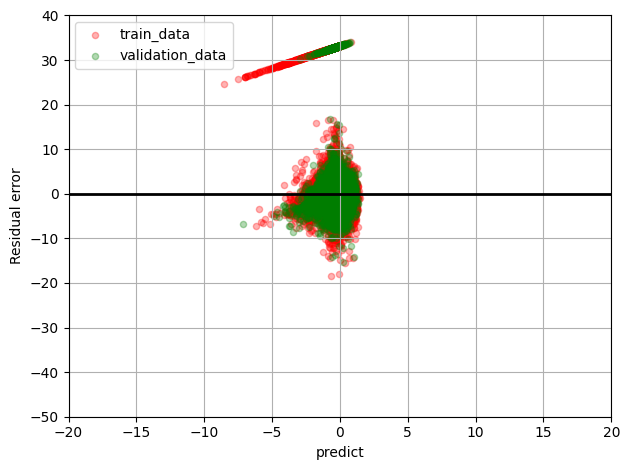

In [92]:
# 予測値と訓練データの残差をプロット
plt.scatter(y_pred_train,             # グラフのx値(予測値)を定義
            y_pred_train - y_train,   # グラフのy値(予測値と訓練データの差)を定義
            c='red',                 # プロットの色を指定
            marker='o',               # マーカーの種類
            s=20,                     # マーカーのサイズ
            alpha=0.3,                # グラフの透過度
            label='train_data')         # ラベル名


# 予測値とテストデータの残差をプロット
plt.scatter(y_pred_test,
            y_pred_test - y_valid,
            c='green',
            marker='o',
            s=20,
            alpha=0.3,
            label='validation_data')

# グラフの詳細設定を行う
plt.xlabel('predict')
plt.ylabel('Residual error')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=20, lw=2, color='black')
plt.xlim([-20, 20])
plt.ylim([-50, 40])
plt.tight_layout()
plt.grid(True)
plt.show()